# Convolutional Networks

**Используя сверточные слои и архитектуру получите на fashion mnist качество не ниже 89,5%**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch

In [3]:
import torchvision as tv

In [4]:
BATCH_SIZE=256

In [5]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
# device

## Данные

In [8]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)

# # Move all data to cuda.
# train_dataset.data.to(device)
# train_dataset.targets.to(device)
# test_dataset.data.to(device)
# test_dataset.targets.to(device)

# Create data loader.
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [9]:
import numpy as np

In [10]:
train.dataset.targets.shape

torch.Size([60000])

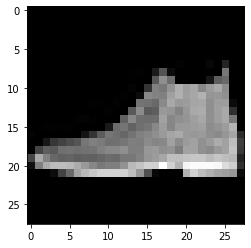

In [11]:
plt.imshow(test_dataset[0][0].numpy().reshape(28,28), cmap='gray')

## Модель

In [13]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.classifier = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3,3), padding=(1,1), stride=(1,1)),
            torch.nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
            # torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3,3), padding=(1,1), stride=(1,1)),
            torch.nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
            # torch.nn.ReLU(),
            torch.nn.Flatten(),
            torch.nn.Linear(16*7*7, 256),
            torch.nn.BatchNorm1d(256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 10)
        )
        
    def forward(self, x):
#         x = x.view(x.size(0), -1)
        return self.classifier(x)

# model
model = CNN()

# move to device.
# model.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001)

In [14]:
model

CNN(
  (classifier): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=784, out_features=256, bias=True)
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [15]:
num_epochs = 20
for epoch in range(num_epochs):
    train_iters, train_passed = 0, 0
    train_loss, train_acc = 0, 0
    for batch_idx, (data, target) in enumerate(train):
        optimizer.zero_grad()
        y_pred = model(data)
        l = loss(y_pred, target)
        l.backward()
        optimizer.step()
        train_loss += l.item()
        train_acc +=(y_pred.argmax(dim=1) == target).sum().item()
        train_iters += 1
        train_passed += len(data)
        
    test_iters, test_passed = 0, 0
    test_loss, test_acc = 0, 0
    for batch_idx, (data, target) in enumerate(test):
        y_pred = model(data)
        l = loss(y_pred, target)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == target).sum().item()
        test_iters += 1
        test_passed += len(data)
        
    # print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, l.item()))
    print("epoch: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(epoch, train_loss / train_iters, train_acc / train_passed, test_loss / test_iters, test_acc / test_passed))

epoch: 0, train_loss: 0.5608059274389389, train_acc: 0.8264333333333334, test_loss: 0.434088246524334, test_acc: 0.8592
epoch: 1, train_loss: 0.3757841114034044, train_acc: 0.8739, test_loss: 0.3696640312671661, test_acc: 0.8735
epoch: 2, train_loss: 0.32571695155285774, train_acc: 0.88675, test_loss: 0.3391613528132439, test_acc: 0.8801
epoch: 3, train_loss: 0.29650153536745844, train_acc: 0.8961666666666667, test_loss: 0.3206093806773424, test_acc: 0.8846
epoch: 4, train_loss: 0.2756468693626688, train_acc: 0.9033166666666667, test_loss: 0.30736653693020344, test_acc: 0.8884
epoch: 5, train_loss: 0.2590578892763625, train_acc: 0.9088666666666667, test_loss: 0.2973133195191622, test_acc: 0.8911
epoch: 6, train_loss: 0.24504866726855015, train_acc: 0.9137, test_loss: 0.28958231918513777, test_acc: 0.8938
epoch: 7, train_loss: 0.23273700164987685, train_acc: 0.9178666666666667, test_loss: 0.2837443552911282, test_acc: 0.896
epoch: 8, train_loss: 0.22164775348724203, train_acc: 0.9219666